In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2024-ml-w4p1/train.csv
/kaggle/input/2024-ml-w4p1/test.csv
/kaggle/input/2024-ml-w4p1/sample_submit.csv


In [3]:
# 랜덤시드 고정

import random
import os

seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

In [4]:
#pandas 라이브러리를 통한 데이터 불러오기

train = pd.read_csv('/kaggle/input/2024-ml-w4p1/train.csv')
test = pd.read_csv('/kaggle/input/2024-ml-w4p1/test.csv')
submit = pd.read_csv('/kaggle/input/2024-ml-w4p1/sample_submit.csv')

print(train.head())

    N    P    K  temperature   humidity        ph    rainfall        label
0  22   36   16    30.581395  50.771481  8.184229   64.585596    mothbeans
1  18   27   41    22.365094  92.308824  7.175344  104.821633  pomegranate
2  61   68   50    35.214628  91.497251  6.793245  243.074507       papaya
3  26   72   22    28.767949  37.577921  4.674942   91.720849   pigeonpeas
4   2  140  197    22.697801  92.822234  5.534567  105.050823        apple


In [8]:
x = train.drop(['label'], axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(train['label'].values) 

In [10]:
#데이터 분류
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)

In [20]:
#정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

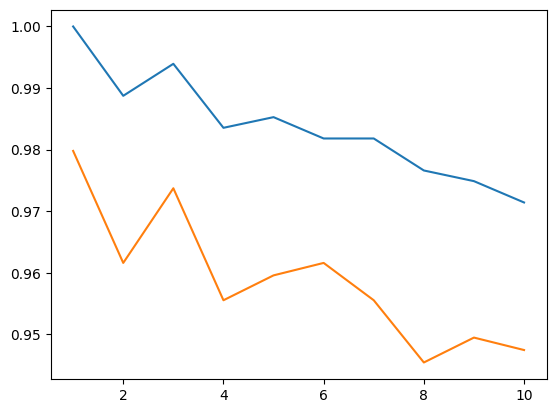

In [24]:
#knn 예측 및 정확도 평가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

#정확도 저장할 배열
train_accuracy = []
test_accuracy = []

#정확도 측정 범위 1~10
neighbors_settings = range(1, 11)

for i in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(x_sc, y_train) # model fitting
    train_accuracy.append(accuracy_score(y_train, knn.predict(x_train_std)))
    test_accuracy.append(accuracy_score(y_test, knn.predict(x_test_std)))

#정확도 그래프 그리기
plt.plot(neighbors_settings, train_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.show()

In [13]:
y_train_pred = knc.predict(x_sc) # train data의 y값 예측값
y_test_pred = knc.predict(x_test_sc)  # 모델을 적용한 test data의 y값 예측값
#test_pred = knc.predict(test_sc)
print('Misclassified training samples: %d' %(y_train != y_train_pred).sum())
#오분류 데이터 개수 확인
print('Misclassified test samples: %d' %(y_test != y_test_pred).sum())
#오분류 데이터 개수 확인

Misclassified training samples: 20
Misclassified test samples: 13
